<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Logistic regression</a></span></li><li><span><a href="#Random-forest" data-toc-modified-id="Random-forest-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Random forest</a></span></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Upsampling</a></span><ul class="toc-item"><li><span><a href="#СЛУЧАЙНЫЙ-ЛЕС" data-toc-modified-id="СЛУЧАЙНЫЙ-ЛЕС-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>СЛУЧАЙНЫЙ ЛЕС</a></span></li><li><span><a href="#ЛОГИСТИЧЕСКАЯ-РЕГРЕССИЯ" data-toc-modified-id="ЛОГИСТИЧЕСКАЯ-РЕГРЕССИЯ-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ</a></span></li></ul></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Downsampling</a></span><ul class="toc-item"><li><span><a href="#СЛУЧАЙНЫ-ЛЕС" data-toc-modified-id="СЛУЧАЙНЫ-ЛЕС-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>СЛУЧАЙНЫ ЛЕС</a></span></li><li><span><a href="#ЛОГИСТИЧЕСКАЯ-РЕГРЕССИЯ" data-toc-modified-id="ЛОГИСТИЧЕСКАЯ-РЕГРЕССИЯ-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод:</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li><li><span><a href="#Общий-вывод-по-проекту" data-toc-modified-id="Общий-вывод-по-проекту-7"><span class="toc-item-num">7&nbsp;&nbsp;</span><b>Общий вывод по проекту</b></a></span></li><li><span><a href="#Общий-вывод-по-проекту-В2" data-toc-modified-id="Общий-вывод-по-проекту-В2-8"><span class="toc-item-num">8&nbsp;&nbsp;</span><b>Общий вывод по проекту В2</b></a></span></li><li><span><a href="#Общий-вывод-по-проекту-В3" data-toc-modified-id="Общий-вывод-по-проекту-В3-9"><span class="toc-item-num">9&nbsp;&nbsp;</span><b>Общий вывод по проекту В3</b></a></span></li><li><span><a href="#Общий-вывод-по-проекту-В4" data-toc-modified-id="Общий-вывод-по-проекту-В4-10"><span class="toc-item-num">10&nbsp;&nbsp;</span><b>Общий вывод по проекту В4</b></a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

На осносании исторических данных о расторжении договоров, посчитаем вероятность ухода клиента, для принятия соответствующих мер. 

Построим и протестируем модель с предельно большим значением *F1*-меры. Целевое значениеметрики, которое будет считаться успехом в проделанной работе доведем до 0.59. Проверим *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измерим *AUC-ROC*, сравнивая её значение с *F1*-мерой.


## Подготовка данных

In [40]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.metrics import accuracy_score, f1_score

from scipy.stats import uniform
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [41]:
df = pd.read_csv('/datasets/Churn.csv')

In [42]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.00,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.00,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.00,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.00,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.00,125510.82,1,1,1,79084.10,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [44]:
df["Tenure"] = df["Tenure"].fillna(df["Tenure"].median())

In [45]:
df["Tenure"] = df["Tenure"].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Итак, решаем задчу классификации, так как у нас количественные признаки. Это задача относится к классу обучение с учителем, потому, что у нас есть целевой признак и обучающий набор данных.

Построим матрицу корреляции признаков:

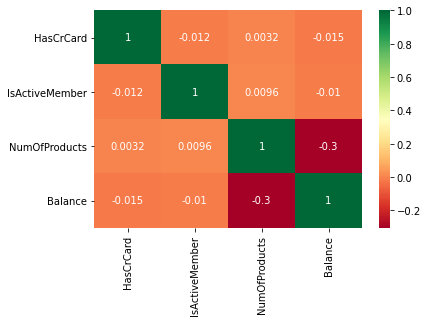

In [46]:
sns.heatmap(df[['HasCrCard', 'IsActiveMember', 'NumOfProducts', 'Balance']].corr(), cmap='RdYlGn', annot=True)
plt.show()

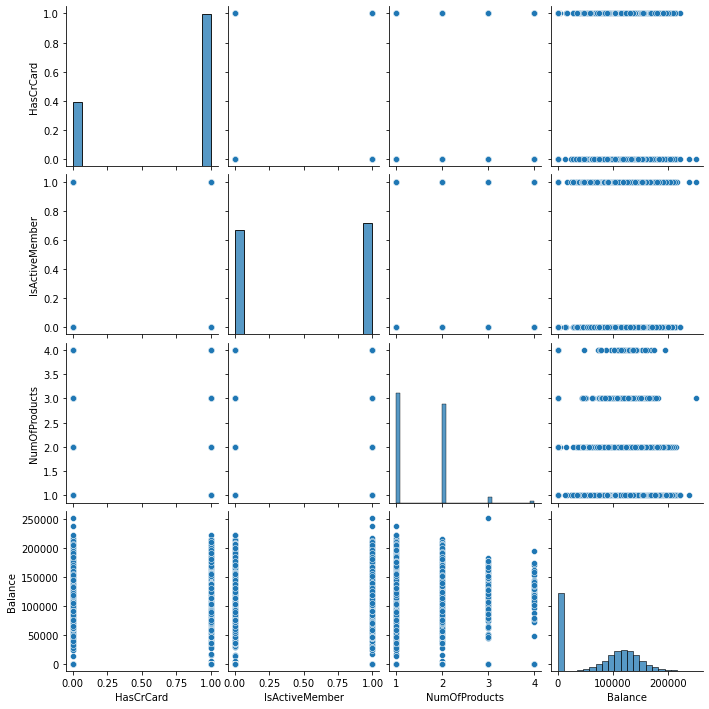

In [47]:
sns.pairplot(df[['HasCrCard', 'IsActiveMember', 'NumOfProducts', 'Balance']])
plt.show()

Корреляция признаков столбцов 'HasCrCard', 'IsActiveMember', очевидна

Удалим столбцы, которые не относятся к расчетам по оттоку и будут только уменьшать качество создаваемых моделей.
Особое значение для чистоты данных имеет столбец "HasCrCard", а точнее его отсутствие, так как он очень схож со значением

In [48]:
df.drop(["HasCrCard","RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

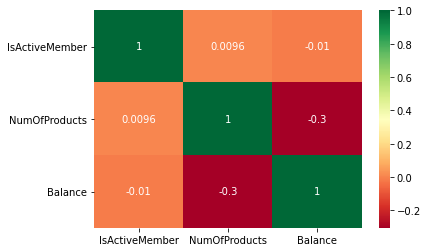

In [49]:
sns.heatmap(df[['IsActiveMember', 'NumOfProducts', 'Balance']].corr(), cmap='RdYlGn', annot=True)
plt.show()

Все в порядке, продолжим

In [50]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,1,112542.58,0


Доля объектов положительного класса:

In [51]:
sum(df["Exited"]/len(df))

0.20369999999999389

Доля объектов отрицательного класса:

In [52]:
1-sum(df["Exited"]/len(df))

0.7963000000000061

Объектов отрицательного класса намного больше

Onehot encoding преобразуем категориальные переменные в числовые значения

gender_one_hot = pd.get_dummies(df["Gender"], drop_first=True)
country_one_hot = pd.get_dummies(df["Geography"], drop_first=True)
df.drop(["Gender", "Geography"], axis=1, inplace=True)
df_one_hot = pd.concat([df, gender_one_hot, country_one_hot], axis=1)

In [53]:
df_ohe = pd.get_dummies(df, drop_first=True)
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   IsActiveMember     10000 non-null  int64  
 6   EstimatedSalary    10000 non-null  float64
 7   Exited             10000 non-null  int64  
 8   Geography_Germany  10000 non-null  uint8  
 9   Geography_Spain    10000 non-null  uint8  
 10  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 654.4 KB


In [54]:
target = df_ohe["Exited"]
features = df_ohe.drop("Exited", axis = 1)

Scaling приведем данные к удобному масштабу

In [55]:
scaler = MinMaxScaler()
df_ohe_scaled = df_ohe.copy(deep=True)
df_ohe_scaled[["Balance", "EstimatedSalary"]] = scaler.fit_transform(df_ohe_scaled[["Balance", "EstimatedSalary"]])

Проверим на Пропуски

In [56]:
df_ohe_scaled.isna().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64

In [57]:
features = df_ohe_scaled.drop("Exited", axis=1)
target = df["Exited"]

Деление на обучающую, валидационную и тестовую выборки

In [58]:
features_train, features_test0, target_train, target_test0 = train_test_split(features, target, 
                                                                              test_size=0.6, 
                                                                              random_state=1)

In [59]:
target_test0.value_counts().to_frame()

,Exited
0,4770
1,1230


In [60]:
features_valid, features_test, target_valid, target_test = train_test_split(features_test0, target_test0, 
                                                                              test_size=0.5, 
                                                                              random_state=1)

In [61]:
target_test.value_counts().to_frame()

,Exited
0,2366
1,634


In [62]:
features_train = pd.DataFrame(features_train)
features_valid = pd.DataFrame(features_valid)
target_train = pd.Series(target_train)
target_valid = pd.Series(target_valid)

## Исследование задачи

<h3>Обучение моделей</h3>

Создадим модели Логистической регресси и случайного леса и выясним точность и гармоничность, 
завершив исследование вычислением площади пространства между прямой случайной модели и 
текущих двух(расчитаем AUC-ROC для каждой отдельно)

<h4>Logistic regression</h4>

In [83]:
    best_depth = 0
    best_est = 0
    best_result = 0
    for depth in range(8, 15):
        for est in range(40, 50):
            model_log = LogisticRegression(solver='lbfgs', max_iter=10, random_state=12345)
            model_log.fit(features_train, target_train)
            result = model.score(features_valid, target_valid)
            if result > best_result:
                best_result = result
                best_depth = depth
                best_est = est
    print('Наилучшее качество достигается при max_depth =', best_depth, 'и n_estimators =', best_est)
    print()     



Наилучшее качество достигается при max_depth = 8 и n_estimators = 40



In [64]:
predictions_regress = rs_regress.predict(features_valid)

report_regress = classification_report(target_valid, predictions_regress, output_dict=True)
report_regress = pd.DataFrame(report_regress).transpose()
pd.set_option('display.float_format', '{:.2f}'.format)
print(report_regress)

              precision  recall  f1-score  support
0                  0.83    0.97      0.90  2404.00
1                  0.66    0.22      0.33   596.00
accuracy           0.82    0.82      0.82     0.82
macro avg          0.75    0.59      0.61  3000.00
weighted avg       0.80    0.82      0.78  3000.00


<h4>Random forest</h4>

In [84]:
    best_depth = 0
    best_est = 0
    best_result = 0
    for depth in range(8, 15):
        for est in range(40, 50):
            model_f = RandomForestClassifier(n_estimators = est, max_depth = depth, random_state=12345)
            model_f.fit(features_train, target_train)
            result = model.score(features_valid, target_valid)
            if result > best_result:
                best_result = result
                best_depth = depth
                best_est = est
    print('Наилучшее качество достигается при max_depth =', best_depth, 'и n_estimators =', best_est)
    print()     

Наилучшее качество достигается при max_depth = 8 и n_estimators = 40



Получим предсказания модели случайного леса и выведем сводный отчет о метриках accuracy, precision, recall, f1-score.

In [85]:
predictions_forest = model_f.predict(features_valid)

report_forest = classification_report(target_valid, predictions_forest, output_dict=True)
report_forest = pd.DataFrame(report_forest).transpose()
pd.set_option('display.float_format', '{:.2f}'.format)
print(report_forest)

              precision  recall  f1-score  support
0                  0.88    0.97      0.92  2404.00
1                  0.77    0.46      0.58   596.00
accuracy           0.86    0.86      0.86     0.86
macro avg          0.82    0.71      0.75  3000.00
weighted avg       0.86    0.86      0.85  3000.00


Случайный лес показал неплохие результаты, продолжим его исследование.

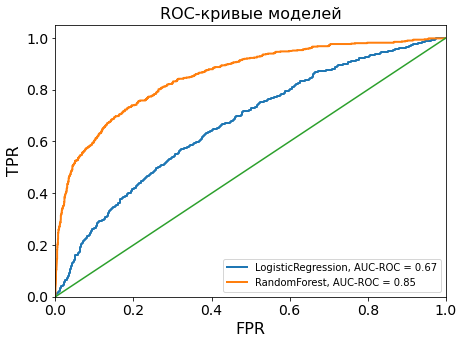

In [87]:
fpr1, tpr1, thresholds1 = roc_curve(target_valid, model_log.predict_proba(features_valid)[:,1], pos_label=1)
fpr2, tpr2, thresholds2 = roc_curve(target_valid, model_f.predict_proba(features_valid)[:,1], pos_label=1)

auc_regress = roc_auc_score(target_valid, model_log.predict_proba(features_valid)[:,1])
auc_forest = roc_auc_score(target_valid, model_f.predict_proba(features_valid)[:,1])

lw=2
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(fpr1, tpr1, lw=lw, label= 'LogisticRegression, AUC-ROC = %.2f' %auc_regress)
ax.plot(fpr2, tpr2, lw=lw, label= 'RandomForest, AUC-ROC = %.2f' %auc_forest)

plt.title('ROC-кривые моделей', fontsize=16)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1])
plt.xlim([0.0, 1.0])
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.ylim([0.0, 1.05])
plt.tick_params(which='major', labelsize=14)
plt.show()

In [88]:
data = {'accuracy':[report_regress.loc['accuracy', 'support'], report_forest.loc['accuracy', 'support']],
        'precision':[report_regress.loc['1', 'precision'], report_forest.loc['1', 'precision']],
        'recall':[report_regress.loc['1', 'recall'], report_forest.loc['1', 'recall']],
        'F1':[report_regress.loc['1', 'f1-score'], report_forest.loc['1', 'f1-score']],
       'AUC-ROC': [auc_regress, auc_forest]}

table_compare = pd.DataFrame(data)
pd.set_option('display.float_format', '{:.2f}'.format)
table_compare.index = ['Логистическая регрессия', 'Случайный лес']
print(table_compare)

                         accuracy  precision  recall   F1  AUC-ROC
Логистическая регрессия      0.82       0.66    0.22 0.33     0.67
Случайный лес                0.86       0.77    0.46 0.58     0.85


Увеличим и уменьшим выборки, контролируя изменения выходящих ключевых параметров.

## Борьба с дисбалансом

<h3>Upsampling</h3>

In [93]:

# Увеличиваем число наблюдений положительного класса
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [140]:
features_upsampled_train, target_upsampled_train = upsample(features_train, target_train, repeat=4)

Целевой признак до увеличения выборки

In [141]:
target_train.value_counts()

0    3193
1     807
Name: Exited, dtype: int64

Целевой признак после увеличения выборки

In [142]:
target_upsampled_train.value_counts()

1    3228
0    3193
Name: Exited, dtype: int64

<h4>СЛУЧАЙНЫЙ ЛЕС</h4>

In [106]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 10)
 
model_f = RandomForestClassifier(random_state=12345)
model_f.fit(features_upsampled,target_upsampled)
predicted_valid = model.predict(features_valid)


In [125]:
predictions_forest_up = model_f.predict(features_valid)

report_forest_up = classification_report(target_valid, predictions_forest_up, output_dict=True)
report_forest_up = pd.DataFrame(report_forest_up).transpose()

print(report_forest_up)

              precision  recall  f1-score  support
0                  0.89    0.93      0.91  2404.00
1                  0.66    0.55      0.60   596.00
accuracy           0.85    0.85      0.85     0.85
macro avg          0.78    0.74      0.76  3000.00
weighted avg       0.85    0.85      0.85  3000.00


<h4>ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ</h4>

In [124]:
features_upsampled, target_upsampled = upsample(features_train, target_train,4)
 
model_log = LogisticRegression(solver='lbfgs', random_state=12345)
model_log.fit(features_upsampled,target_upsampled)
predicted_valid = model.predict(features_valid)


In [114]:
predictions_regress_up = model_log.predict(features_valid)

report_regress_up = classification_report(target_valid, predictions_regress_up, output_dict=True)
report_regress_up = pd.DataFrame(report_regress_up).transpose()
pd.set_option('display.float_format', '{:.2f}'.format)
print(report_regress_up)

              precision  recall  f1-score  support
0                  0.94    0.35      0.52  2404.00
1                  0.26    0.91      0.40   596.00
accuracy           0.47    0.47      0.47     0.47
macro avg          0.60    0.63      0.46  3000.00
weighted avg       0.81    0.47      0.49  3000.00


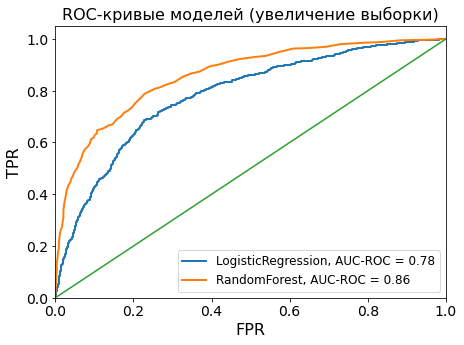

In [115]:
fpr1, tpr1, thresholds1 = roc_curve(target_valid, model_log.predict_proba(features_valid)[:,1], pos_label=1)
fpr2, tpr2, thresholds2 = roc_curve(target_valid, model_f.predict_proba(features_valid)[:,1], pos_label=1)

auc_regress_up = roc_auc_score(target_valid, model_log.predict_proba(features_valid)[:,1])
auc_forest_up = roc_auc_score(target_valid, model_f.predict_proba(features_valid)[:,1])

lw=2
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(fpr1, tpr1, lw=lw, label= 'LogisticRegression, AUC-ROC = %.2f' %auc_regress_up)
ax.plot(fpr2, tpr2, lw=lw, label= 'RandomForest, AUC-ROC = %.2f' %auc_forest_up)

plt.title('ROC-кривые моделей (увеличение выборки)', fontsize=16)
plt.legend(loc='lower right', prop={'size':12})
plt.plot([0,1], [0,1])
plt.xlim([0.0, 1.0])
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.ylim([0.0, 1.05])
plt.tick_params(which='major', labelsize=14)
plt.show()

In [116]:
data = {'accuracy':[report_regress_up.loc['accuracy', 'support'], report_forest_up.loc['accuracy', 'support']],
        'precision':[report_regress_up.loc['1', 'precision'], report_forest_up.loc['1', 'precision']],
        'recall':[report_regress_up.loc['1', 'recall'], report_forest_up.loc['1', 'recall']],
        'F1':[report_regress_up.loc['1', 'f1-score'], report_forest_up.loc['1', 'f1-score']],
       'AUC-ROC': [auc_regress_up, auc_forest_up]}

table_compare = pd.DataFrame(data)

table_compare.index = ['Логистическая регрессия', 'Случайный лес']
print(table_compare)

                         accuracy  precision  recall   F1  AUC-ROC
Логистическая регрессия      0.47       0.26    0.91 0.40     0.78
Случайный лес                0.85       0.66    0.55 0.60     0.86


<h3>Downsampling</h3>

In [117]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [167]:
features_downsampled_train, target_downsampled_train = downsample(features_train, target_train, fraction=0.3)

In [168]:
target_train.value_counts()

0    3193
1     807
Name: Exited, dtype: int64

In [169]:
target_downsampled_train.value_counts()

0    958
1    807
Name: Exited, dtype: int64

<h4>СЛУЧАЙНЫ ЛЕС</h4>

In [170]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.3)
 
model_f_d = RandomForestClassifier(random_state=12345)
model_f_d.fit(features_downsampled,target_downsampled)
predicted_valid = model.predict(features_valid)


In [171]:
predictions_forest_down = model_f_d.predict(features_valid)

report_forest_down = classification_report(target_valid, predictions_forest_down, output_dict=True)
report_forest_down = pd.DataFrame(report_forest_down).transpose()

print(report_forest_down)

              precision  recall  f1-score  support
0                  0.96    0.49      0.65  2404.00
1                  0.31    0.92      0.46   596.00
accuracy           0.58    0.58      0.58     0.58
macro avg          0.64    0.71      0.56  3000.00
weighted avg       0.83    0.58      0.61  3000.00


<h4>ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ</h4>

In [172]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.3)

model_log_d = LogisticRegression(solver='liblinear', random_state=12345)
model_log_d.fit(features_downsampled,target_downsampled)
predicted_valid = model.predict(features_valid)

In [173]:
predictions_regress_down = model_log_d.predict(features_valid)

report_regress_down = classification_report(target_valid, predictions_regress_down, output_dict=True)
report_regress_down = pd.DataFrame(report_regress_down).transpose()

print(report_regress_down)

              precision  recall  f1-score  support
0                  0.95    0.35      0.51  2404.00
1                  0.26    0.92      0.41   596.00
accuracy           0.47    0.47      0.47     0.47
macro avg          0.61    0.64      0.46  3000.00
weighted avg       0.81    0.47      0.49  3000.00


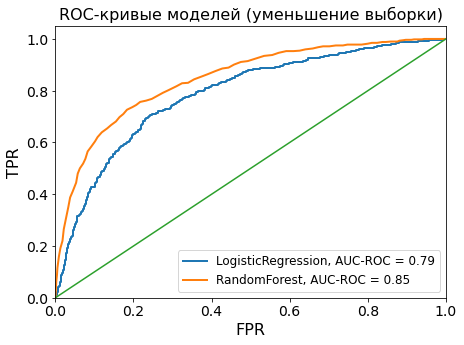

In [174]:
fpr1, tpr1, thresholds1 = roc_curve(target_valid, model_log_d.predict_proba(features_valid)[:,1], pos_label=1)
fpr2, tpr2, thresholds2 = roc_curve(target_valid, model_f_d.predict_proba(features_valid)[:,1], pos_label=1)

auc_regress_down = roc_auc_score(target_valid, model_log_d.predict_proba(features_valid)[:,1])
auc_forest_down = roc_auc_score(target_valid, model_f_d.predict_proba(features_valid)[:,1])

lw=2
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(fpr1, tpr1, lw=lw, label= 'LogisticRegression, AUC-ROC = %.2f' %auc_regress_down)
ax.plot(fpr2, tpr2, lw=lw, label= 'RandomForest, AUC-ROC = %.2f' %auc_forest_down)

plt.title('ROC-кривые моделей (уменьшение выборки)', fontsize=16)
plt.legend(loc='lower right', prop={'size':12})
plt.plot([0,1], [0,1])
plt.xlim([0.0, 1.0])
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.ylim([0.0, 1.05])
plt.tick_params(which='major', labelsize=14)
plt.show()

In [175]:
data = {'accuracy':[report_regress_down.loc['accuracy', 'support'], report_forest_down.loc['accuracy', 'support']],
        'precision':[report_regress_down.loc['1', 'precision'], report_forest_down.loc['1', 'precision']],
        'recall':[report_regress_down.loc['1', 'recall'], report_forest_down.loc['1', 'recall']],
        'F1':[report_regress_down.loc['1', 'f1-score'], report_forest_down.loc['1', 'f1-score']],
       'AUC-ROC': [auc_regress_down, auc_forest_down]}

table_compare = pd.DataFrame(data)

table_compare.index = ['Логистическая регрессия', 'Случайный лес']
print(table_compare)

                         accuracy  precision  recall   F1  AUC-ROC
Логистическая регрессия      0.47       0.26    0.92 0.41     0.79
Случайный лес                0.58       0.31    0.92 0.46     0.85


## Тестирование модели

In [176]:
predictions_forest_balanced_test = model_f.predict(features_test)

report_forest_balanced_test = classification_report(target_test, predictions_forest_balanced_test, output_dict=True)
report_forest_balanced_test = pd.DataFrame(report_forest_balanced_test).transpose()

print(report_forest_balanced_test)

              precision  recall  f1-score  support
0                  0.88    0.94      0.91  2366.00
1                  0.69    0.54      0.60   634.00
accuracy           0.85    0.85      0.85     0.85
macro avg          0.79    0.74      0.76  3000.00
weighted avg       0.84    0.85      0.84  3000.00


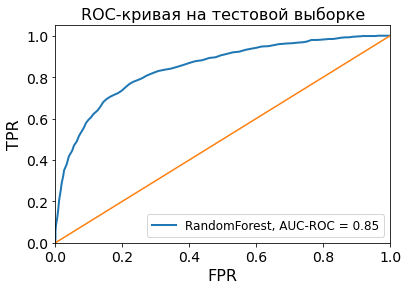

In [177]:
fpr, tpr, thresholds = roc_curve(target_test, model_f_d.predict_proba(features_test)[:,1], pos_label=1)
auc_forest_test = roc_auc_score(target_test, model_f_d.predict_proba(features_test)[:,1])
lw=2
plt.plot(fpr, tpr, lw=lw, label= 'RandomForest, AUC-ROC = %.2f' %auc_forest_test)

plt.title('ROC-кривая на тестовой выборке', fontsize=16)
plt.legend(loc='lower right', prop={'size':12})
plt.plot([0,1], [0,1])
plt.xlim([0.0, 1.0])
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.ylim([0.0, 1.05])
plt.tick_params(which='major', labelsize=14)
plt.show()

<h2>Вывод:</h2>

- В результате первичного анализа, был выялен явный дисбаланс калассов отрицательного к положительному - 4 к 1.
- Выполнили этап предобработки данных, Осуществили заполнение пропусков, провели шкалирование, сделали One_hot_encoding. 
- Модель логистической регресси до борьбы сдисбалансом, показала результат 0.33, а модель случайного леса с рекзултативностью метрики f1 - 58%.
- Сделали upsampling положительного класса случайного леса, благодаря чему удалось достич показателя f1 меры 60%. Dowmsampling оказался более эффективен.
- Проверка на тестовой выборке показала, что не изменилась метрика f1 и осталась 60%.